In [1]:
from pathlib import Path
import pprint
import numpy as np
import shutil
import matplotlib.pyplot as plt

int_to_str = {0:"CPR:3", 1:"CPR:4", 2:"CPR:5", 3:"CPR:6", 4:"CPR:9", 5:"NULL"}

## Displaying results

We will now add the results of RE to the same annotation file

In [2]:
def generate_brat(prob_path,pair_path,ann_path):
    global diff_list
    prob = np.loadtxt(prob_path)
    m,n = prob.shape
    indices = np.argmax(prob,axis=1)
    max_val = np.max(prob,axis=1)
    prob[range(0,m),indices] = 0
    max_val2 = np.max(prob,axis=1)
    
    diff_list.extend([(x,y) for x,y in zip(list(max_val-max_val2),list(indices))])
    class_ind = list(indices)
    count_list = [0]*6
    count = 0
    with open(pair_path,'r') as f:
        data = f.readlines()
        entity_pairs = [line.split() for line in data]
#     print(len(class_ind),len(entity_pairs))
    assert (len(class_ind)==len(entity_pairs))

    output_path = ann_path.parent / str(ann_path.name)[4:]
    shutil.copy(ann_path, output_path)
#     print(str(output_path))
    with open(output_path,'a') as f:
        for i in range(len(class_ind)):
            count_list[class_ind[i]] += 1
            if(class_ind[i]==5):
                continue
            f.write("R" + str(count) + "\t" + int_to_str[class_ind[i]] + " Arg1:" + entity_pairs[i][0] + " Arg2:" + entity_pairs[i][1] + "\n")
            count += 1
    return count_list

In [3]:
count_dict = {}
diff_list = []

def walk_dir(root):
    global count_dict
    if(root.is_dir()):
        for child in root.iterdir():
            walk_dir(child)
    else:
        if(root.name == 'test_results.tsv'):
            pair_path = root.parent / 'pairs.tsv'
            ann_path = root.parent / ('old_' + str(root.parent.name) + '.ann')
            if(ann_path.exists() and ann_path.exists()):
                count_dict[root.parent.name] = generate_brat(root,pair_path,ann_path)

[  168.   109.     0.     0.  1280. 32397.]


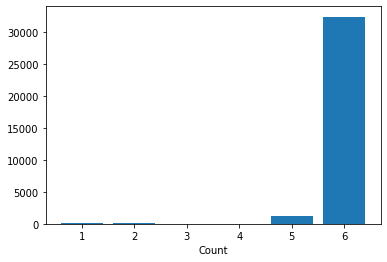

In [6]:
walk_dir(Path('../data/backup/scispacy2/'))
# pprint.pprint(count_dict)

count = np.zeros(6)
for key in count_dict.keys():
    count += np.array(count_dict[key])
print(count)

plt.bar([1,2,3,4,5,6],count)
plt.xlabel('Count')
plt.show()

In [12]:
pprint.pprint(count_dict)

{'sb3000673': [0, 0, 0, 0, 4, 336],
 'sb3000723': [0, 0, 0, 0, 0, 137],
 'sb300074k': [0, 0, 0, 0, 48, 857],
 'sb3000782': [3, 0, 0, 0, 25, 694],
 'sb300091d': [3, 0, 0, 0, 1, 156],
 'sb300092n': [0, 0, 0, 0, 3, 187],
 'sb3001003': [0, 2, 0, 0, 15, 476],
 'sb4000355': [0, 0, 0, 0, 1, 226],
 'sb400065q': [0, 2, 0, 0, 1, 279],
 'sb4001118': [0, 0, 0, 0, 3, 291],
 'sb400112u': [3, 0, 0, 0, 19, 251],
 'sb400115e': [0, 0, 0, 0, 10, 344],
 'sb400136f': [0, 2, 0, 0, 26, 383],
 'sb4001382': [0, 13, 0, 0, 45, 384],
 'sb400142b': [0, 0, 0, 0, 6, 120],
 'sb500243c': [0, 0, 0, 0, 27, 257],
 'sb500291r': [0, 0, 0, 0, 0, 195],
 'sb500309r': [13, 0, 0, 0, 22, 483],
 'sb500368w': [0, 0, 0, 0, 65, 246],
 'sb5b00012': [0, 2, 0, 0, 1, 231],
 'sb5b00025': [0, 0, 0, 0, 13, 428],
 'sb5b00080': [1, 0, 0, 0, 0, 161],
 'sb5b00103': [0, 0, 0, 0, 15, 521],
 'sb5b00129': [0, 0, 0, 0, 10, 189],
 'sb5b00199': [19, 0, 0, 0, 6, 281],
 'sb5b00289': [1, 2, 0, 0, 21, 401],
 'sb6b00007': [0, 0, 0, 0, 10, 355],
 'sb6b0005

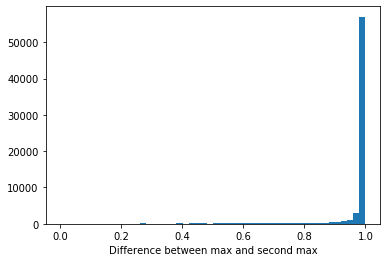

In [8]:
plt.hist([t[0] for t in diff_list],bins=50)
plt.xlabel('Difference between max and second max')
plt.show()

In [9]:
min(diff_list)

(0.0013242099999999923, 5)

In [10]:
sorted(diff_list)

[(0.0013242099999999923, 5),
 (0.0013242099999999923, 5),
 (0.0015016599999999602, 0),
 (0.0015016599999999602, 0),
 (0.0022547299999999826, 5),
 (0.0022547299999999826, 5),
 (0.0023412099999999825, 5),
 (0.0023412099999999825, 5),
 (0.0029271599999999842, 0),
 (0.0029271599999999842, 0),
 (0.0030065200000000125, 0),
 (0.0030065200000000125, 0),
 (0.0038269999999999693, 4),
 (0.0038269999999999693, 4),
 (0.003970569999999951, 4),
 (0.003970569999999951, 4),
 (0.0041639800000000116, 4),
 (0.0041639800000000116, 4),
 (0.005481359999999991, 5),
 (0.005481359999999991, 5),
 (0.006345280000000009, 4),
 (0.006345280000000009, 4),
 (0.007149629999999962, 0),
 (0.007149629999999962, 0),
 (0.007364660000000023, 5),
 (0.007364660000000023, 5),
 (0.007825059999999995, 5),
 (0.007825059999999995, 5),
 (0.008342579999999988, 4),
 (0.008342579999999988, 4),
 (0.010247219999999946, 5),
 (0.010247219999999946, 5),
 (0.010509729999999995, 5),
 (0.010509729999999995, 5),
 (0.011149599999999982, 4),
 (0.